<a href="https://colab.research.google.com/github/manuel-rdz/ECG_obesity/blob/main/MixedEnsemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np

signal_datasets_used = 9
signal_datasets_paths = []

working_dir = 'drive/My Drive/datasets/'
data_dir = working_dir + 'DeepLearning/FinalProject/ptb/1800_9_500'

info_dataset = 'info_dataset_drive_1800.csv'
info_path = os.path.join(data_dir, info_dataset)

ensemble_mixed = working_dir + 'DeepLearning/FinalProject/ensemble_mixed.h5'
mlp = working_dir + 'DeepLearning/FinalProject/mlp.h5'

for i in range(0, signal_datasets_used):
  signal_datasets_paths.append(os.path.join(data_dir, 'dataset' + str(i) + '.csv'))

**Get datasets**

---



In [3]:
signals_data = []

for path in signal_datasets_paths:
  f = open(path)
  signals_data.append(f.read())
  f.close()

In [4]:
f = open(info_path)
info_data = f.read()
f.close()

In [5]:
def get_dataset(data, start):
  signal_lines = data.split('\n')
  header_signal = signal_lines[0].split(',')
  signal_lines = signal_lines[start:-1]
  print(header_signal)
  print(len(header_signal))
  print(len(signal_lines))
  return signal_lines, header_signal

In [6]:
signals_lines = []

for data in signals_data:
  signals_lines.append(get_dataset(data, 0))

['2.001800184287704787e-01', '2.001800184287704787e-01', '1.996339424329854895e-01', '1.985317882054423166e-01', '1.972930461672797176e-01', '1.960114682399708430e-01', '1.947315964133080612e-01', '1.936811961241243774e-01', '1.931238051671714251e-01', '1.929345765818840097e-01', '1.926208272142032052e-01', '1.918263214556025775e-01', '1.906574547191635660e-01', '1.894214784639908222e-01', '1.882240426871687466e-01', '1.869835355781759301e-01', '1.856553134157888918e-01', '1.844539520702476731e-01', '1.844128379255267070e-01', '1.844128379255267070e-01', '1.847603565137044268e-01', '1.847603565137044268e-01', '1.810731865593187551e-01', '1.751572362073350320e-01', '1.698766588635336472e-01', '1.672341025591953523e-01', '1.670753539793389253e-01', '1.670753539793389253e-01', '1.672271661752918193e-01', '1.672521117710818461e-01', '1.672534084628874429e-01', '1.672534084628874429e-01', '1.672534084628874429e-01', '1.672534084628874429e-01', '1.672534084628874429e-01', '1.6725340846288744

In [7]:
info_lines = info_data.split('\n')
header_info = info_lines[0].split(',')
info_lines = info_lines[:-1]
print(header_info)
print(len(info_lines))

['15782', '160', '74', '1', '30.46875']
1800


In [8]:
import numpy as np

def get_float_data(lines, header, start):
  float_data = np.zeros([len(lines), len(header) - start])
  print(float_data.shape)
  for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[start:]]
    values.extend([values[-1]] * ((len(header) - start) - len(values)))
    float_data[i, :] = values
  return float_data

In [9]:
float_signals = []

for lines in signals_lines:
  float_signals.append(get_float_data(lines[0], lines[1], 0))

(1800, 400)
(1800, 400)
(1800, 400)
(1800, 400)
(1800, 400)
(1800, 400)
(1800, 400)
(1800, 400)
(1800, 400)


In [10]:
print(len(header_info))

float_info = get_float_data(info_lines, header_info, 1)

5
(1800, 4)


In [11]:
print(float_signals[0].shape)
print(float_info.shape)

(1800, 400)
(1800, 4)


**Preprocess signal dataset**

---



In [12]:
import pandas as pd

signal_df = pd.DataFrame(float_signals[0])
signal_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
count,1.800000e+03,1.800000e+03,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1.800000e+03,...,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,1.593297e-01,1.590748e-01,0.158539,0.157936,0.157386,0.156903,0.156506,0.156151,0.155819,0.155517,0.155125,0.154815,0.154656,0.154627,0.154633,0.154586,0.154439,0.154280,0.154071,0.153838,0.153620,0.153485,0.153400,0.153317,0.153118,0.152929,0.152810,0.152814,0.152850,0.152776,0.152621,0.152371,0.152075,0.151804,0.151602,0.151486,0.151535,0.151558,0.151522,1.514332e-01,...,0.177074,0.175222,0.173604,0.172036,0.170520,0.168966,0.167489,0.166195,0.165081,0.163943,0.162705,0.161571,0.160519,0.159545,0.158628,0.157661,0.156770,0.156032,0.155374,0.154849,0.154381,0.153841,0.153284,0.152666,0.152086,0.151507,0.151018,0.150520,0.150154,0.149867,0.149649,0.149468,0.149246,0.149063,0.148909,0.148890,0.148912,0.148913,0.148847,0.148662
std,1.561608e-01,1.558965e-01,0.155199,0.154297,0.153288,0.152442,0.151795,0.151399,0.151190,0.151180,0.151223,0.151257,0.151307,0.151406,0.151492,0.151552,0.151692,0.151939,0.152011,0.151869,0.151566,0.151510,0.151779,0.152108,0.152366,0.152277,0.151945,0.151578,0.151171,0.150662,0.150119,0.149560,0.149045,0.148614,0.148460,0.148426,0.148542,0.148564,0.148572,1.486529e-01,...,0.157901,0.156602,0.155681,0.154875,0.154144,0.153263,0.152344,0.151436,0.150622,0.149689,0.148762,0.147987,0.147270,0.146528,0.145838,0.145172,0.144620,0.144218,0.143942,0.143687,0.143572,0.143344,0.143148,0.143029,0.142651,0.142081,0.141441,0.140868,0.140506,0.140204,0.139996,0.139783,0.139531,0.139380,0.139301,0.139477,0.139811,0.140073,0.140081,0.139826
min,-1.110223e-16,-1.110223e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.110223e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [13]:
drop = set()

for dataset in float_signals:
  cnt = np.count_nonzero(dataset, axis=1)
  #print(cnt)
  for idx, v in enumerate(cnt):
    if v == 0:
      drop.add(idx)

float_signals = np.delete(float_signals, list(drop), axis=1)
float_info = np.delete(float_info, list(drop), axis=0)

print(len(drop))
print(drop)

print(float_signals.shape)
print(float_info.shape)

534
{6, 10, 11, 16, 17, 18, 21, 22, 24, 29, 36, 37, 38, 40, 45, 49, 51, 55, 56, 57, 58, 61, 65, 66, 70, 72, 77, 83, 85, 89, 91, 96, 101, 109, 117, 121, 122, 124, 125, 127, 135, 138, 153, 155, 162, 165, 167, 174, 180, 183, 186, 187, 191, 194, 195, 196, 201, 209, 210, 211, 212, 218, 219, 224, 225, 227, 228, 231, 232, 236, 238, 239, 240, 243, 244, 250, 253, 256, 258, 261, 271, 273, 277, 279, 280, 289, 291, 297, 298, 307, 312, 317, 318, 322, 325, 326, 327, 329, 332, 335, 339, 346, 347, 354, 356, 357, 360, 364, 366, 367, 371, 375, 377, 379, 383, 384, 387, 392, 393, 395, 397, 399, 402, 406, 410, 417, 423, 430, 434, 437, 441, 446, 449, 450, 458, 461, 462, 470, 473, 477, 481, 482, 488, 489, 491, 496, 498, 506, 520, 523, 525, 526, 527, 528, 529, 533, 536, 537, 539, 540, 543, 544, 554, 561, 562, 564, 570, 580, 586, 590, 591, 595, 600, 604, 608, 610, 611, 613, 614, 615, 617, 618, 619, 623, 626, 628, 630, 636, 638, 639, 644, 649, 652, 654, 655, 657, 660, 673, 674, 677, 678, 683, 686, 693, 697, 703

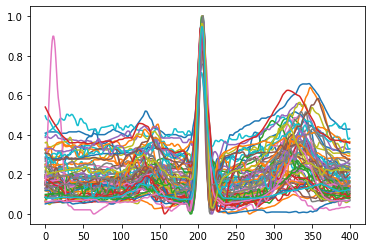

In [14]:
import matplotlib.pyplot as plt

for i in range(0,70):
  plt.plot(float_signals[0][i, :])

**Preprocess info dataset**

---



In [15]:
training_size = int(len(float_info[:, 0]) * 0.8 * 0.8)
validation_size = int(len(float_info[:, 0]) * 0.8 - training_size)
testing_size = len(float_info[:, 0]) - training_size - validation_size

print(training_size, validation_size, testing_size)
print(training_size + validation_size + testing_size)

810 202 254
1266


In [17]:
import pandas as pd

info_df = pd.DataFrame(float_info)
info_df.describe()

,0,1,2,3
count,1266.000000,1266.000000,1266.000000,1266.000000
mean,165.492891,62.515798,0.578199,28.726514
std,10.020628,15.124835,0.494042,5.831181
min,104.000000,12.000000,0.000000,13.984008
25%,158.000000,53.000000,0.000000,24.099723
50%,165.000000,65.000000,1.000000,30.071168
75%,173.000000,74.000000,1.000000,32.503548
max,196.000000,91.000000,1.000000,59.416025


In [18]:
# change bmi to label if there's obesity or not based on the value
float_info[:, 3] = np.where(float_info[:, 3]>=30.0, 1, 0)

In [21]:
float_info.shape

(1266, 4)

In [22]:
info_df = pd.DataFrame(float_info)
one_hot = pd.get_dummies(info_df[2])

# append one-hot encoding
float_info = np.append(float_info, one_hot, axis=1);

# erase gender column
float_info = np.delete(float_info, 2, axis=1)

# move bmi column to last
target = float_info[:, 2]

target = target[:, np.newaxis]
float_info = np.delete(float_info, 2, axis=1)
float_info = np.append(float_info, target, axis=1)

# erase height column
float_info = np.delete(float_info, 0, axis=1)

print(float_info.shape)
print(np.isnan(float_info).any())

(1266, 4)
False


In [23]:
import pandas as pd

info_df = pd.DataFrame(float_info)
info_df.describe()

,0,1,2,3
count,1266.000000,1266.000000,1266.000000,1266.000000
mean,62.515798,0.421801,0.578199,0.513428
std,15.124835,0.494042,0.494042,0.500017
min,12.000000,0.000000,0.000000,0.000000
25%,53.000000,0.000000,0.000000,0.000000
50%,65.000000,0.000000,1.000000,1.000000
75%,74.000000,1.000000,1.000000,1.000000
max,91.000000,1.000000,1.000000,1.000000


**Split data**

---



In [24]:
train_signalX = []
train_infoX = []

val_signalX = []
val_infoX = []

test_signalX = []
test_infoX = []

train_perm = np.random.permutation(training_size)
val_perm = np.random.permutation(validation_size)
test_perm = np.random.permutation(testing_size)

# set Y labels
trainY = float_info[:training_size, -1]
valY = float_info[training_size:training_size + validation_size, -1]
testY = float_info[training_size + validation_size:, -1]

trainY = trainY[train_perm]
valY = valY[val_perm]
testY = testY[test_perm]


# set the other data
for float_signal in float_signals:
  # training
  tsX = float_signal[:training_size, :]
  tiX = float_info[:training_size, :-1]

  train_signalX.append(tsX[train_perm])
  train_infoX.append(tiX[train_perm])

  # validation
  vsX = float_signal[training_size:training_size + validation_size, :]
  viX = float_info[training_size:training_size+validation_size, :-1]

  val_signalX.append(vsX[val_perm])
  val_infoX.append(viX[val_perm])

  # testing
  tstX = float_signal[training_size + validation_size:, :]
  tstiX = float_info[training_size + validation_size:, :-1]

  test_signalX.append(tstX[test_perm])
  test_infoX.append(tstiX[test_perm])

  # add extra dimension for rnn input
  train_signalX[-1]=train_signalX[-1][:,:,np.newaxis]
  val_signalX[-1]=val_signalX[-1][:,:,np.newaxis]
  test_signalX[-1]=test_signalX[-1][:,:,np.newaxis]


In [25]:
print(len(train_signalX))
print(len(train_infoX))
print(len(trainY))

print(len(val_signalX))
print(len(val_infoX))
print(len(valY))

print(len(test_signalX))
print(len(test_infoX))
print(len(testY))

9
9
810
9
9
202
9
9
254


In [26]:
print(train_signalX[0].shape)
print(train_infoX[0].shape)
print(trainY.shape)

print(val_signalX[0].shape)
print(val_infoX[0].shape)
print(valY.shape)

print(test_signalX[0].shape)
print(test_infoX[0].shape)
print(testY.shape)

(810, 400, 1)
(810, 3)
(810,)
(202, 400, 1)
(202, 3)
(202,)
(254, 400, 1)
(254, 3)
(254,)


In [27]:
import tensorflow as tf
from keras.layers import Layer, Concatenate

class WeightedAverage(Layer):

    def __init__(self, n_output):
        super(WeightedAverage, self).__init__()
        self.W = tf.Variable(initial_value=tf.random.uniform(shape=[1,1,n_output], minval=0, maxval=1),
            trainable=True) # (1,1,n_inputs)

    def call(self, inputs):

        # inputs is a list of tensor of shape [(n_batch, n_feat), ..., (n_batch, n_feat)]
        # expand last dim of each input passed [(n_batch, n_feat, 1), ..., (n_batch, n_feat, 1)]
        inputs = [tf.expand_dims(i, -1) for i in inputs]
        inputs = Concatenate(axis=-1)(inputs) # (n_batch, n_feat, n_inputs)
        weights = tf.nn.softmax(self.W, axis=-1) # (1,1,n_inputs)
        # weights sum up to one on last dim

        return tf.reduce_sum(weights*inputs, axis=-1) # (n_batch, n_feat)

    def get_config(self):
      config = super().get_config().copy()
      config.update({
          'W': self.W.numpy(),
      })
      return config

In [28]:
from keras import layers

def create_mixed_model(mlp_inputX, rnn_inputX):
  mlp_input = Input(shape=(mlp_inputX.shape[1], ))
  rnn_input = Input(shape=(rnn_inputX.shape[1], rnn_inputX.shape[2]))

  mlp = Dense(32, activation='relu') (mlp_input)
  mlp = Dense(32, activation='relu') (mlp)
  mlp = Model(inputs=mlp_input, outputs=mlp)

  rnn = layers.Bidirectional(layers.LSTM(100, activation='relu', return_sequences=True)) (rnn_input)
  rnn = layers.Bidirectional(layers.LSTM(100, activation='relu')) (rnn)
  rnn = Model(inputs=rnn_input, outputs=rnn)

  mixed_input = concatenate([mlp.output, rnn.output])

  mixed = Dense(32, activation='relu') (mixed_input)
  mixed = Dense(32, activation='relu') (mixed)
  mixed = Dense(1, activation='sigmoid') (mixed)

  return mlp_input, rnn_input, mixed

In [29]:
def create_rnn_model(rnn_inputX):
  rnn_input = Input(shape=(rnn_inputX))

**Multi input model**

---



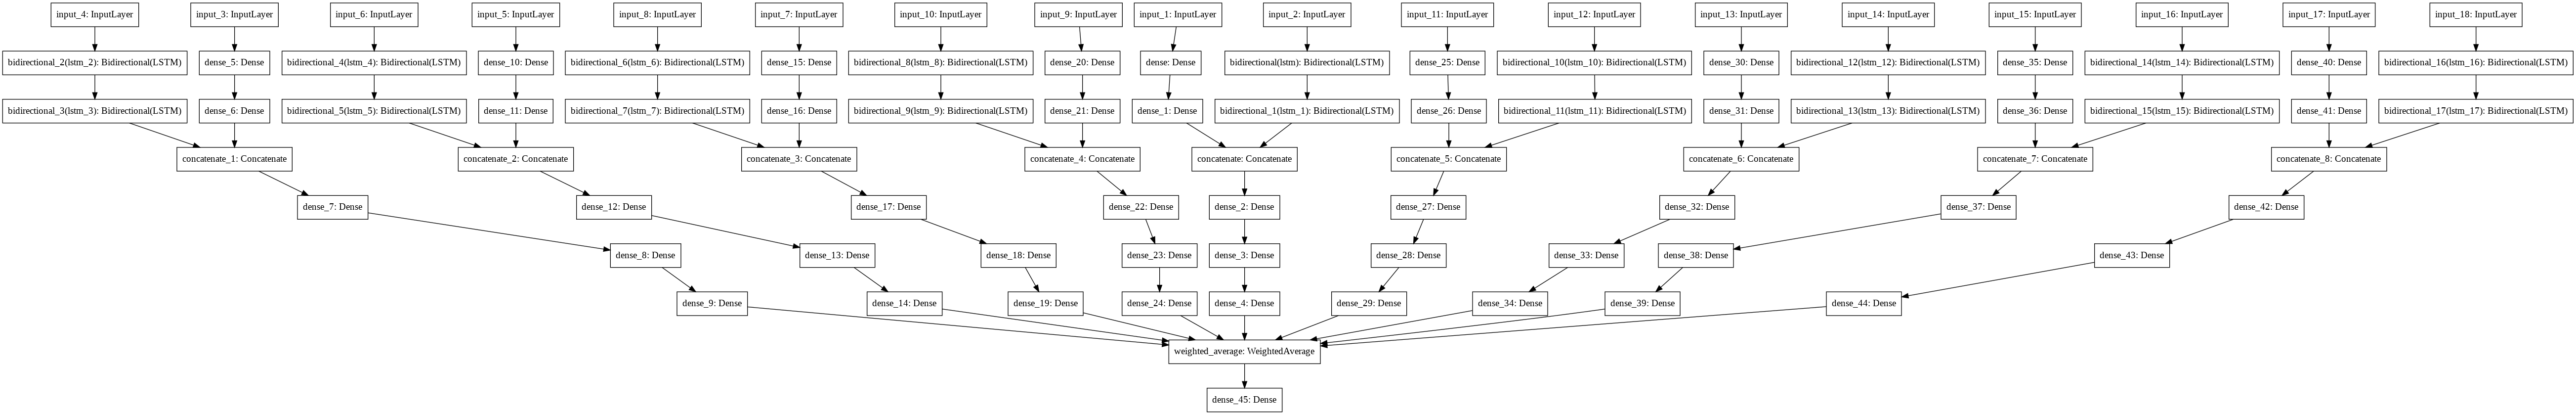

In [30]:
from keras.models import Model
from keras.layers import Dense, GRU, concatenate
from keras import Input
from keras.utils import plot_model

inputs = []
models = []

for i in range(signal_datasets_used):
  i_mlp, i_rnn, mixed = create_mixed_model(train_infoX[i], train_signalX[i])
  inputs.append(i_mlp)
  inputs.append(i_rnn)
  models.append(mixed)

w_avg = WeightedAverage(n_output=len(models))(models)
out = Dense(1, activation='sigmoid')(w_avg)


model = Model(inputs=inputs, outputs=out)

plot_model(model)

#model.summary()

In [31]:
def create_mixed_inputs(data1, data2):
  data3 = []
  for idx in range(len(data1)):
    data3.append(data1[idx])
    data3.append(data2[idx])
  return data3

In [ ]:
# Mixed model

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks_list = [EarlyStopping(monitor='val_accuracy', patience=7), 
                  ModelCheckpoint(filepath=ensemble_mixed, monitor='val_accuracy', save_best_only=True, verbose=1), 
                  ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2)]

train_inputs = create_mixed_inputs(train_infoX, train_signalX)
validation_inputs = create_mixed_inputs(val_infoX, val_signalX)

model.fit(train_inputs, trainY,
          steps_per_epoch=50, 
          epochs=1000, 
          batch_size=32,
          callbacks=callbacks_list,
          validation_data=(validation_inputs, valY), 
          verbose=1)

Epoch 1/1000
50/50 [==============================] - 1069s 21s/step - loss: 0.6901 - accuracy: 0.5150 - val_loss: 0.6857 - val_accuracy: 0.5446

Epoch 00001: val_accuracy improved from -inf to 0.54455, saving model to drive/My Drive/datasets/DeepLearning/FinalProject/ensemble_mixed.h5
Epoch 2/1000
50/50 [==============================] - 1037s 21s/step - loss: 0.6894 - accuracy: 0.5070 - val_loss: 0.6827 - val_accuracy: 0.5446

Epoch 00002: val_accuracy did not improve from 0.54455
Epoch 3/1000
50/50 [==============================] - 1024s 20s/step - loss: 0.6891 - accuracy: 0.5028 - val_loss: 0.6828 - val_accuracy: 0.5446

Epoch 00003: val_accuracy did not improve from 0.54455
Epoch 4/1000
46/50 [==========================>...] - ETA: 1:20 - loss: 0.6893 - accuracy: 0.5053

In [ ]:
test_inputs = create_mixed_inputs(test_infoX, test_signalX)

model.evaluate(test_inputs, testY)

In [ ]:
from keras.models import load_model

model = load_model(ensemble_mixed)

test_inputs = create_mixed_inputs(test_infoX, test_signalX)

model.evaluate(test_inputs, testY)

In [ ]:
# MLP model

from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense, GRU, concatenate, Dropout
from keras import Input



callbacks_list = [EarlyStopping(monitor='val_accuracy', patience=20), 
                  ModelCheckpoint(filepath=mlp, monitor='val_accuracy', save_best_only=True, verbose=1), 
                  ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3)]

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_infoX[0].shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_infoX[0], trainY,
          steps_per_epoch=200, 
          epochs=1000, 
          batch_size=64,
          callbacks=callbacks_list,
          validation_data=(val_infoX[0], valY), 
          verbose=1)

In [ ]:
from keras.models import load_model

#model = load_model(mlp)

model.evaluate(test_infoX[0], testY)